In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
data = {}
path = 'data'

In [3]:
for file in os.listdir(path):
    data[file.split('_')[0]] = pd.read_csv(os.path.join(path, file))

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.keys()

dict_keys(['hourly', 'lookupTable', 'sample', 'target', 'weather'])

# 날짜별 SMP

In [41]:
hourly = data['hourly']
hourly['datetime'] = pd.to_datetime(hourly['datetime'])

hourly['hour'] = hourly['datetime'].apply(row.hour)

hourly['day'] = hourly['datetime'].apply(lambda row: int(row[-8:-6]))
hourly['month'] = hourly['datetime'].apply(lambda row: int(row[-11:-9]))
hourly['year'] = hourly['datetime'].apply(lambda row: int(row[-14:-12]))

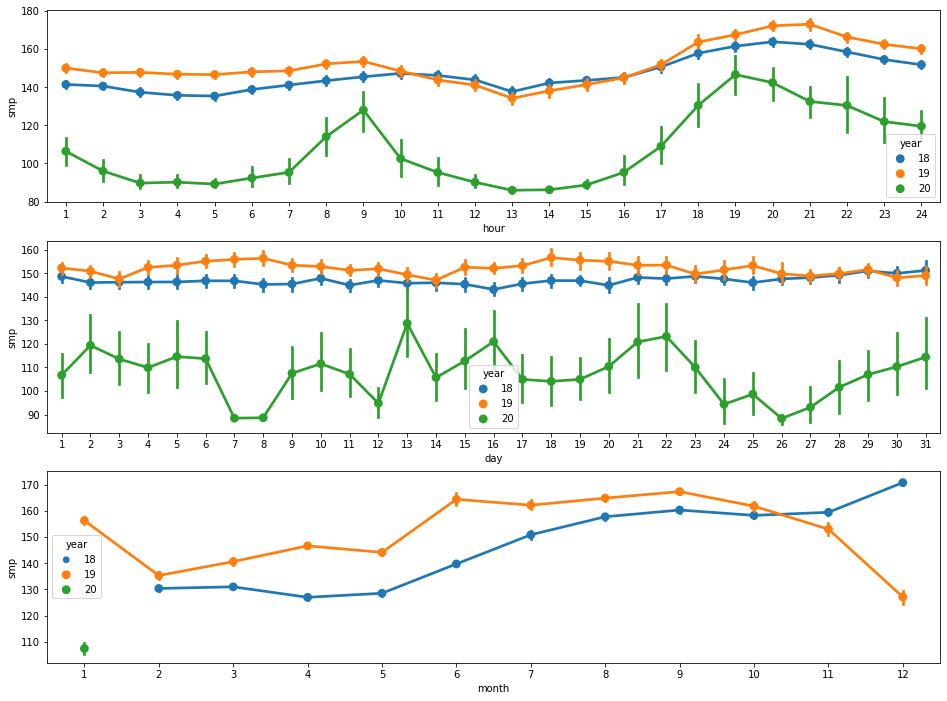

In [48]:
fig = plt.figure(figsize=[16,12])
cols = ['hour', 'day', 'month']
ax = dict()

for i, col in enumerate(cols):
    ax[i] = fig.add_subplot(len(cols),1,i+1)
    ax[i] = sns.pointplot(x=col,y='smp',hue='year',data=hourly)


# 날짜별 SMP 최대, 최소, 평균, 공급량

In [121]:
target = data['target']
target['date'] = pd.to_datetime(target['date'])

target['year'] = target['date'].apply(lambda row: row.year)
target['month'] = target['date'].apply(lambda row: row.month)
target['day'] = target['date'].apply(lambda row: row.day)

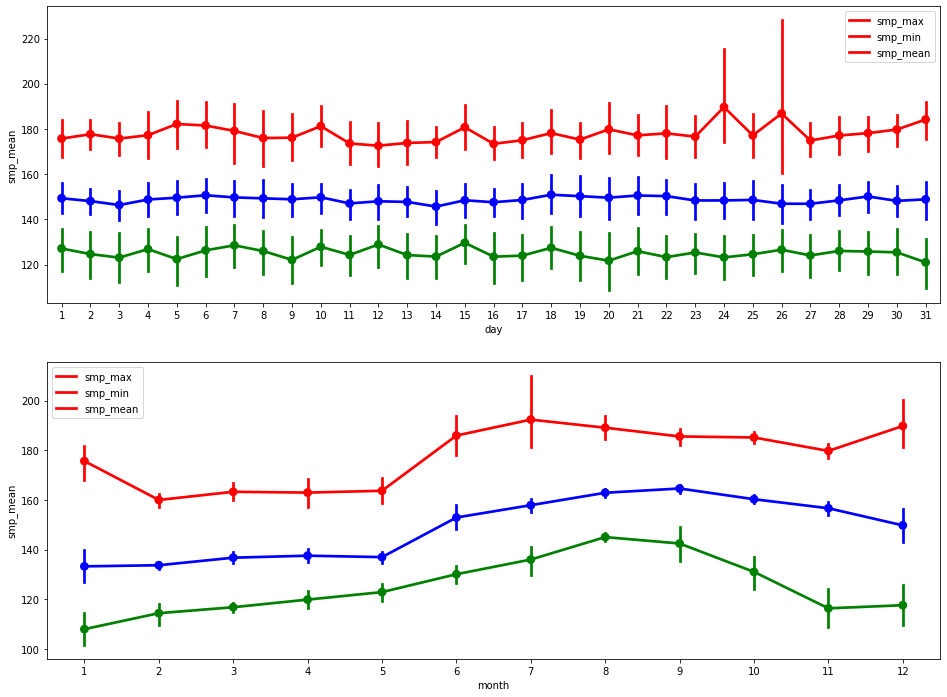

In [99]:
fig = plt.figure(figsize=[16,12])
rows = ['smp_max', 'smp_min', 'smp_mean']
colors = ['r', 'g', 'b']
cols = ['day', 'month']
size = len(cols)
ax = dict()

for idx, col in enumerate(cols, 1):
    ax[idx] = fig.add_subplot(size, 1, idx)
    for row, color in zip(rows, colors):
        sns.pointplot(x=col, y=row, label=row, data=target, ax=ax[idx], color=color)
    ax[idx].legend(labels=rows)

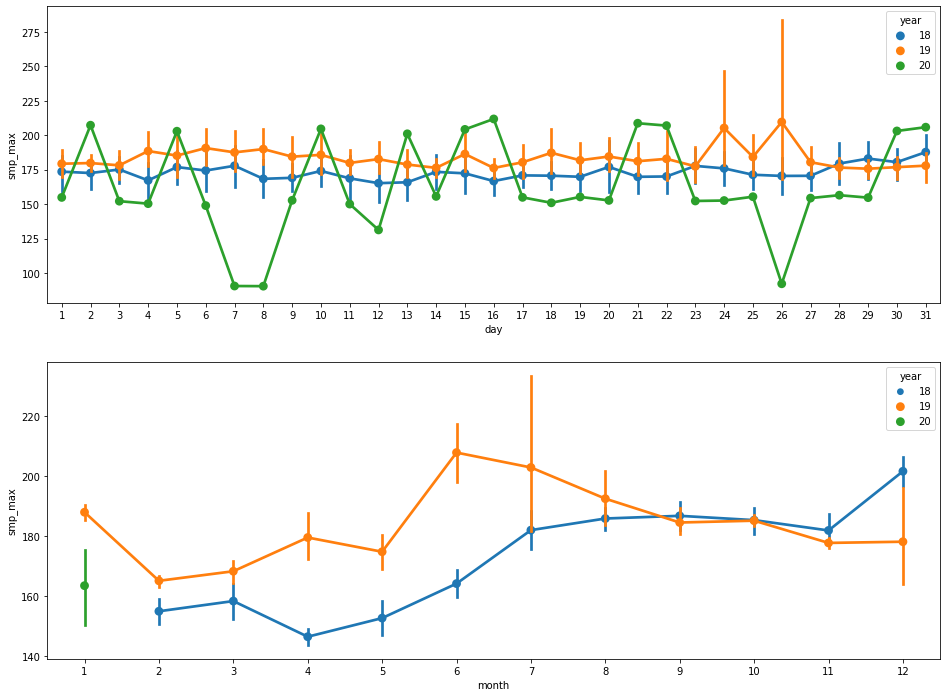

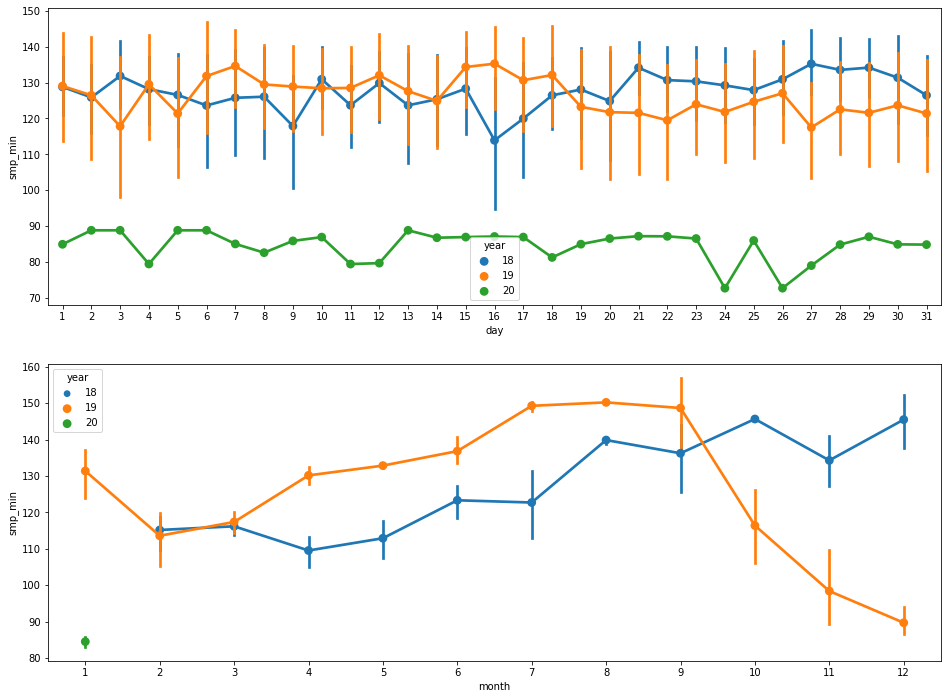

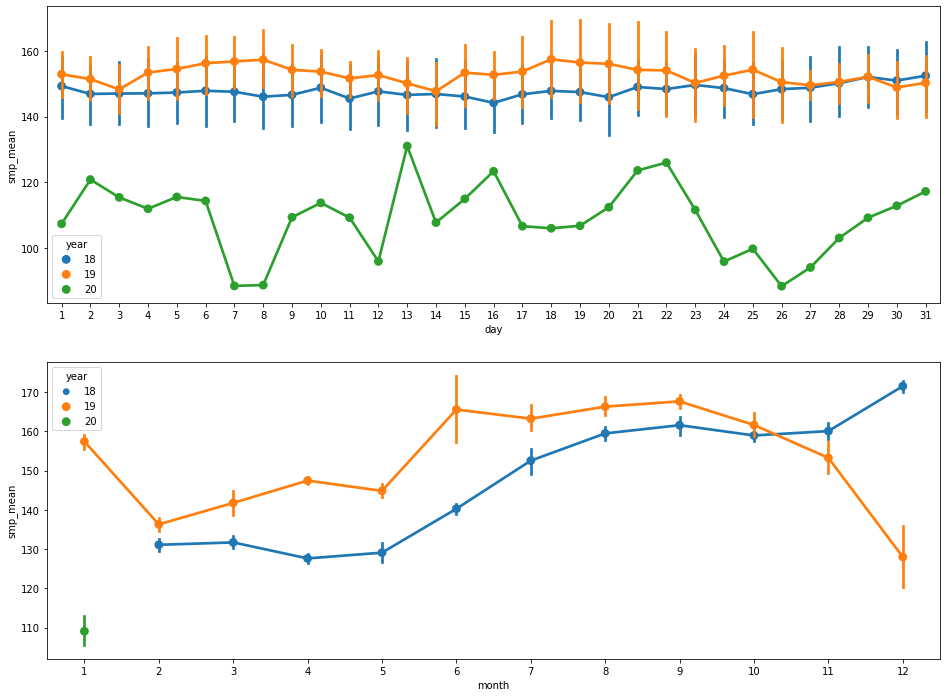

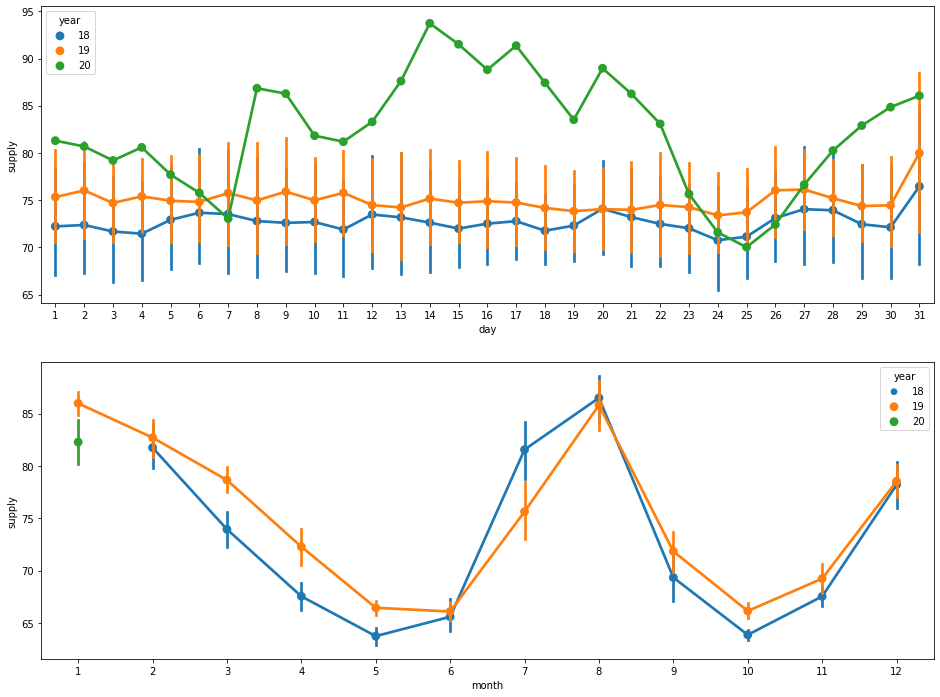

In [63]:
rows = ['smp_max', 'smp_min', 'smp_mean', 'supply']
# size = len(cols) * len(rows)
# idx = 1
ax = dict()

for row in rows:
    fig = plt.figure(figsize=[16,12])
    cols = ['day', 'month']
    size = len(cols)
    
    for idx, col in enumerate(cols, 1):
        ax[idx] = fig.add_subplot(size, 1, idx)
        ax[idx] = sns.pointplot(x=col, y=row, hue='year',data=target)
        
#         idx += 1

# 기온

In [100]:
weather = data['weather']

In [124]:
weather['date'] = pd.to_datetime(weather['datetime'].apply(lambda row: row[:-5]))


In [125]:
display(weather)

,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station,date
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS,2018-02-01
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS,2018-02-01
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS,2018-02-01
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS,2018-02-01
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648847,893,2020-01-31 19:00,6.7,NaN,0.0,NaN,2.7,NaN,9.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS,2020-01-31
648848,893,2020-01-31 20:00,6.5,NaN,0.0,NaN,3.1,NaN,43.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS,2020-01-31
648849,893,2020-01-31 21:00,6.3,NaN,0.0,NaN,2.2,NaN,36.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS,2020-01-31
648850,893,2020-01-31 22:00,6.5,NaN,0.0,NaN,2.9,NaN,36.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AWS,2020-01-31
